In [1]:
%run -i model.ipynb

100%|██████████| 100/100 [00:13<00:00,  7.35it/s]


## Best case scenario

In best case scenario we know `how` to diffirentiate our model. So we know `exact` gradients and `exact` way to improve our model by varying $\mu$.

In [2]:
from IPython.display import clear_output

In [3]:
opt = torch.optim.SGD(params=[mu_dist.v], lr=1e-2)

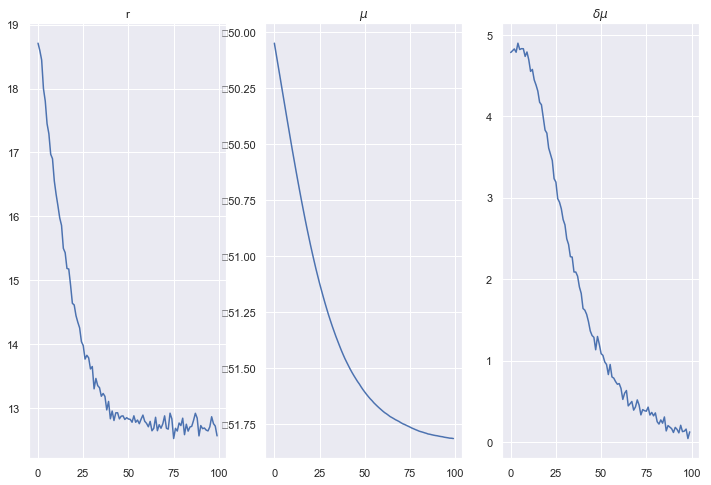

In [4]:
rs = []
mus = []
mu_grads = []

for i in range(100):
    samples = torch.stack([y_sample() for _ in range(10000)])
    r = R(samples)
    
    opt.zero_grad()
    r.backward()
    opt.step()
    
    rs.append(r.item())
    mus.append(mu_dist.v.item())
    mu_grads.append(mu_dist.v.grad.item())

    
    clear_output()
    
    fig, ax = plt.subplots(1, 3, figsize=(12, 8))
    ax[0].plot(rs)
    ax[0].set_title('r')
    ax[1].plot(mus)
    ax[1].set_title('$\mu$')
    ax[2].plot(mu_grads)
    ax[2].set_title('$\delta \mu$')
    plt.show()